# Digital filters

filtering:

* remove noise from a random process (signal)
* restore signal, remove bias

This figure shows a linear system:

![linear system](linsys_en.png "Linear system")

Linearity means that system (filter) operation may be *exchanged* with operations of the linear space (multiplication by scalar, addition).

$$ v_{1in}(t) \Rightarrow v_{1out}(t) $$
$$ v_{2in}(t) \Rightarrow v_{2out}(t) $$
$$ v_{1in}(t)+v_{2in}(t) \Rightarrow v_{2out}(t)+v_{1out}(t) $$

Digital filters are characterised with the filter's **impulse response**. An impulse is a signal that quickly jumps from 0 to a maximum and immediately back. Integration of impulse response provides the filter's **step response**. Fourier transform of impulse response is the **frequency response** of the filter characteristic to the filter in the frequency domain. A logarithmic (dB) scale can also be used to plot frequency response according to the following formula  ($A_{in}$ and $A_{out}$ are input and output amplitudes):

$$ \mathrm{dB} = 20 \log_{10}\frac{A_{out}}{A_{in}}.$$

These functions and their relationships are shown on the following figure:

![response functions](filter_char_en.png "fiter response functions")


## Types of digital filters

Digital filters can be characterised based on their responses (output) to impluse input:

* Finite Impulse Response filter ( **FIR** ), or Moving Average filter  ( MA )

   - discrete *convolution* with filter kernel

* Infinite Impulse Response filter ( **IIR** ), or Autoregressive Moving-Average filter ( ARMA )

   - weighted average of output and input

* Nonlinear filter



## Digital filter characteristics

**Ideal** filters allow passing the input signal through a specified band without any loss together with full (maximum) suppression of unwanted frequencies. We may characterize filters according to their bandpass or band reject properties. 



* *Lowpass* filters:  transmission of low frequencies while rejecting high frequencies

* *Highpass* filters:  transmitting high, rejecting low frequencies of the input signal

* *Bandpass* filters :  transmission of signal frequencies of a specified band

* *Band reject* filter:  rejection of signal frequencies over a specified band

Frequency responses of ideal filters are shown in the following figure:

![ideal filter](filter_ideal_en.png "ideal filters")

A filter's *transmission band* is the range of frequencies that are transmitted through the filter. The gain of an ideal filter is 1 in the passband (which means 0 dB gain), hence signal amplitude remains constant.

A filter's *rejection band* is the range of frequencies that are completely removed by the filter. 

**Real filters** cannot meet the requirements of an ideal filter. In practice there is always a finite *transition band* between the transmission and rejection bands. Gain of the filter gradually changes in the transition band.

There are many good books on digital filters, for example [Introduction to Digital Filters](https://www.dsprelated.com/freebooks/filters/).

## Finite Impulse Response (FIR) filters

Finite Impulse Response (FIR) filtering involves calculation of 

$$ y_n = \sum_{k=0}^{M-1} h_k x_{n-k} $$

where $ x_n $ is the real input signal and $ y_n $ denotes real output signal. These are called *finite* impulse response filters since there is no output for zero input (that is no feedback which can induce output ad infinitum). Sometimes these are called *moving average* or *convolution* filters. $M$ is called *tap*, e.g. a *10-tap* filter has  $ M=10 $ coefficients. For a two-tap filter e.g. $ h_0 = h_1 = 1/2 $, hence

$$ y_n = x_{n}/2 + x_{n-1}/2 $$

For example, for the input $ x_n=1 \hspace{.5em} \forall n \ge 0 $ the output is  $ y_n = 1 \hspace{.5em} \forall n \ge 1  $ . Notice that at the start of the filtering $ n=0 $ we have only one data, hence one more data is needed for a valid filter output. This is the *transient* state of the filter.  Another example is the input
 $ x_n= \exp \left( i\pi n \right)  \hspace{.5em} \forall n\ge 0 $ and the output $ y_n=0 \; \forall n \ge 1  $. These two cases demonstrate that the above moving average filtering removed the highest $ \omega=\pi $ frequency component and preserved the lowest  $ \omega=0 $ frequency (constant) signal component.

Let us analyze this filter using the `scipy.signal` module.

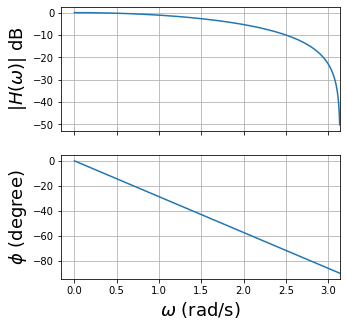

In [1]:
%matplotlib inline
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,1,sharex=True)
plt.subplots_adjust( hspace = .2 )
fig.set_size_inches((5,5))

ax=axs[0]
w,h=signal.freqz([1/2., 1/2.],1) # frequency response
ax.plot(w,20*np.log10(abs(h)))
ax.set_ylabel(r"$|H(\omega)| $ dB",fontsize=18)
ax.grid()

ax=axs[1]
ax.plot(w,np.angle(h)/np.pi*180)
ax.set_xlabel(r'$\omega$ (rad/s)',fontsize=18)
ax.set_ylabel(r"$\phi $ (degree)",fontsize=18)
ax.set_xlim(right = np.pi)
ax.grid()

Upper subfigure shows filter's amplitude response in dB while lower subfigure its phase response in degrees. At $\omega=0 $  $|H(\omega=0)|=1 $ (i.e. unit gain), which indicates unchanged output signal magnitude at $ \omega=0 $. For $\omega= \pi $  $|H(\omega=\pi)|=0$, hence the frequency $ \omega=\pi $ component  is completely discarded.

Let us consider averaging 8 values with the filter.

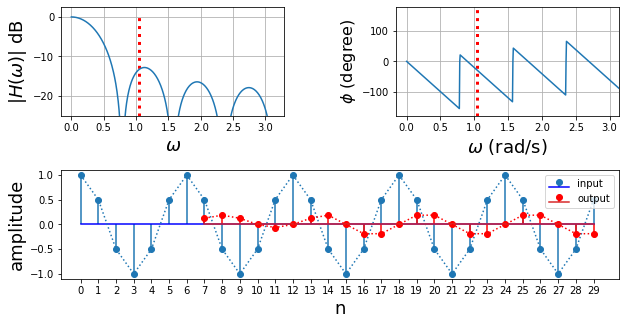

In [2]:
from matplotlib import gridspec

fig=plt.figure()
fig.set_size_inches((10,5))

gs = gridspec.GridSpec(2,2)
gs.update( wspace=0.5, hspace=0.5)

ax = fig.add_subplot(plt.subplot(gs[0,0]))

ma_length = 8 # moving average filter length
w,h=signal.freqz(np.ones(ma_length)/ma_length,1)
with np.errstate(divide='ignore'):
    ax.plot(w,20*np.log10(abs(h)))
ax.set_ylabel(r"$ |H(\omega)| $ dB",fontsize=18)
ax.set_xlabel(r"$\omega$",fontsize=18)
ax.vlines(np.pi/3,-25,0,linestyles=':',color='r',lw=3.)
ax.set_ylim(bottom=-25)
ax.grid()

ax = fig.add_subplot(plt.subplot(gs[0,1]))
ax.plot(w,np.angle(h)/np.pi*180)
ax.set_xlabel(r'$\omega$ (rad/s)',fontsize=18)
ax.set_ylabel(r"$\phi $ (degree)",fontsize=16)
ax.set_xlim(right = np.pi)
ax.set_ylim(bottom=-180,top=180)
ax.vlines(np.pi/3,-180,180,linestyles=':',color='r',lw=3.)
ax.grid()

ax = fig.add_subplot(plt.subplot(gs[1,:]))
Ns=30
n= np.arange(Ns)
x = np.cos(np.arange(Ns)*np.pi/3.)
y= signal.lfilter(np.ones(ma_length)/ma_length,1,x)

ax.stem(n,x,label='input',basefmt='b-', use_line_collection=True)
ax.plot(n,x,':')
ax.stem(n[ma_length-1:],y[:-ma_length+1],markerfmt='ro',linefmt='r-',label='output', use_line_collection=True)
ax.plot(n[ma_length-1:],y[:-ma_length+1],'r:')
ax.set_xlim(left=-1.1)
ax.set_ylim(bottom=-1.1,top=1.1)
ax.set_xlabel("n",fontsize=18)
ax.set_xticks(n)
ax.legend(loc=0)
ax.set_ylabel("amplitude",fontsize=18);

Upper two plots show the filter's amplitude and phase responses. Sawtooths show 180° phase jumps. On the lower plot input and output signals are shown. Output is delayed due to the length of the filter. Since input signal's frequency is $ 2\pi/6 $, its period is $T=6$ hence it repeats with period of six samples. Phase response shows that at this frequency the phase is approximately 30° plus a 180° jump and the output is delayed approximately by half sample ($ 30/360 = 0.5/6 $) plus 3 samples (half of the 6 samples). Amplitude response has several maxima and minima at those frequencies that are zeroed by the filter. Consequently, even if only a couple of values were added to the moving average filter, its behaviour became much more complex.

### FIR moving average filtering of wheel accelerometry

[Ákos Vinkó](http://www.epito.bme.hu/vinko-akos) provided us the 3 axis accelerometry data that were *spline interpolated* to the uniform sampling rate 0.01 s. [aint.dat](aint.dat).

First read and plot tangential and centrifugal acceleration components $a_x$ and $a_y$.

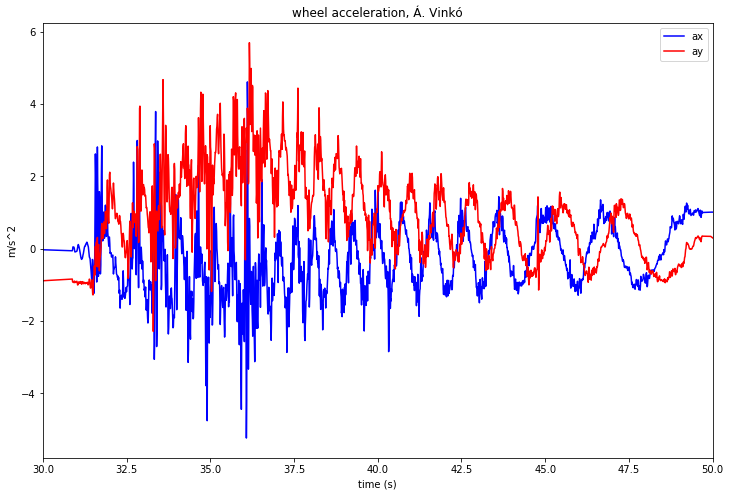

In [3]:
aint = np.loadtxt('aint.dat')
tint= aint[:,0]
axi = aint[:,1]
ayi = aint[:,2]
n = len(tint)
dt = 0.01

xlim = [30,50]
plt.figure(figsize=(12, 8))
plt.plot(tint, axi, label='ax', color='b')
plt.plot(tint, ayi, label='ay', color='r')
plt.xlim(xlim[:])
plt.xlabel('time (s)')
plt.ylabel('m/s^2')
plt.title('wheel acceleration, Á. Vinkó')
plt.legend()
plt.show()

Filter these data with 8 point moving average filter and plot the results

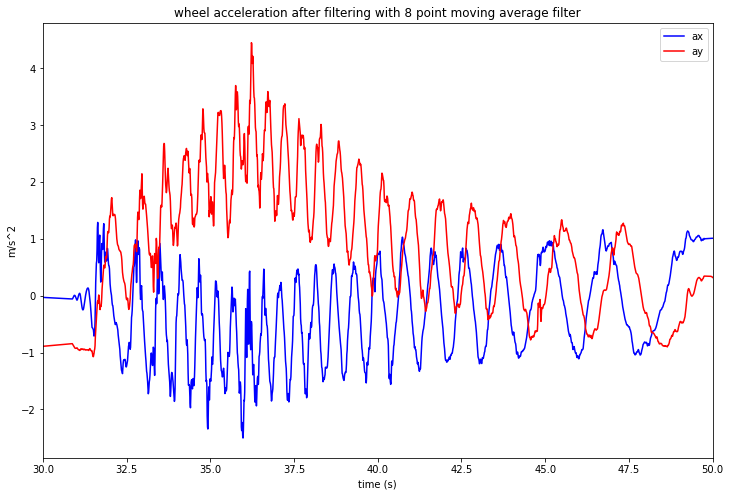

In [4]:
axf = signal.lfilter(np.ones(ma_length)/ma_length,1,axi)
ayf = signal.lfilter(np.ones(ma_length)/ma_length,1,ayi)

plt.figure(figsize=(12, 8))
plt.plot(tint, axf, label='ax', color='b')
plt.plot(tint, ayf, label='ay', color='r')
plt.xlim(xlim[:])
plt.xlabel('time (s)')
plt.ylabel('m/s^2')
plt.title('wheel acceleration after filtering with 8 point moving average filter')
plt.legend()
plt.show()

### FIR filter design

It is very easy to design FIR filters with functions available from the  `scipy.signal` module. For example let us design a lowpass filter. The `nyq=` parameter of the function [`firwin`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin.html) sets Nyquist frequency 50 Hz, which is half of the 100 Hz sampling rate of acceleration data. The first parameter is the number of filter coefficients, the second is cut-off frequency. Earlier we have seen during [wavelet filtering](https://nbviewer.jupyter.org/github/gyulat/Wavelet/blob/master/CWT_filter_en.ipynb) that slipping of the wheel causes signal components above 4 Hz to appear, hence we set cut-off frequency of the filter to 4 Hz.

In [5]:
a = signal.firwin(61, cutoff = 4, window = "hamming", nyq = 50)

Plot filter's frequency, phase, impulse and step responses.

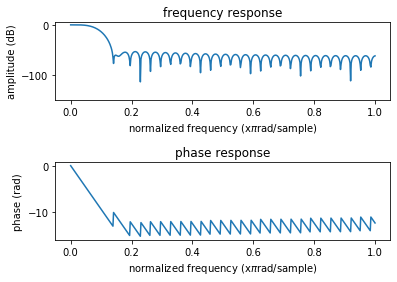

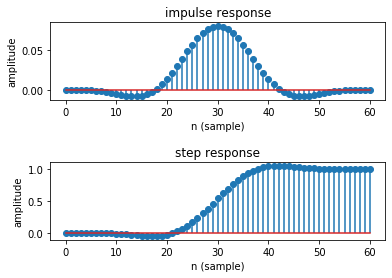

In [6]:
#frequency and phase responses
def mfreqz(b,a=1):
    w,h = signal.freqz(b,a)
    h_dB = 20 * np.log10 (abs(h))
    plt.subplot(211)
    plt.plot(w/max(w),h_dB)
    plt.ylim(-150, 5)
    plt.ylabel('amplitude (dB)')
    plt.xlabel('normalized frequency (x$\pi$rad/sample)')
    plt.title('frequency response')
    plt.subplot(212)
    h_Phase = np.unwrap(np.arctan2(np.imag(h),np.real(h)))
    plt.plot(w/max(w),h_Phase)
    plt.ylabel('phase (rad)')
    plt.xlabel('normalized frequency (x$\pi$rad/sample)')
    plt.title('phase response')
    plt.subplots_adjust(hspace=0.8)

mfreqz(a)
plt.show()

#impulse and step responses
def impz(b,a=1):
    l = len(b)
    impulse = np.repeat(0.,l); impulse[0] =1.
    x = np.arange(0,l)
    response = signal.lfilter(b,a,impulse)
    plt.subplot(211)
    plt.stem(x, response, use_line_collection=True)
    plt.ylabel('amplitude')
    plt.xlabel('n (sample)')
    plt.title('impulse response')
    plt.subplot(212)
    step = np.cumsum(response)
    plt.stem(x, step, use_line_collection=True)
    plt.ylabel('amplitude')
    plt.xlabel('n (sample)')
    plt.title('step response')
    plt.subplots_adjust(hspace=0.8)

plt.figure(2)
impz(a)
plt.show()

Let us make filtering and plot the results.

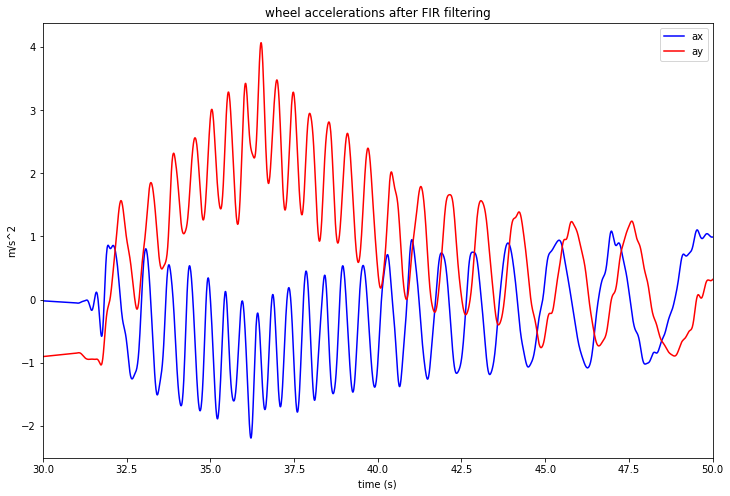

In [7]:
axf1 = signal.lfilter(a,1,axi)
ayf1 = signal.lfilter(a,1,ayi)

plt.figure(figsize=(12, 8))
plt.plot(tint, axf1, label='ax', color='b')
plt.plot(tint, ayf1, label='ay', color='r')
plt.xlim(xlim[:])
plt.xlabel('time (s)')
plt.ylabel('m/s^2')
plt.title('wheel accelerations after FIR filtering')
plt.legend()
plt.show()

Wavelet map of the accelerations showed transients in the range of periods 0.10 - 0.04 s due to wheel slips. Let us design a bandbpass FIR filter for this 10 - 25 Hz band and filter our data.

Bandpass filter is created from the combination of suitable low- and highpass fiters.

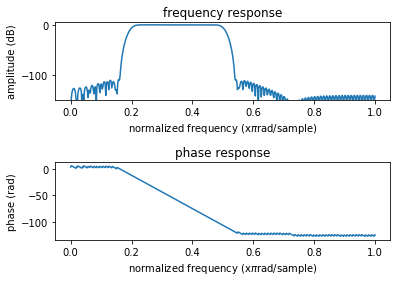

In [8]:
n = 201
#Lowpass filter
a = signal.firwin(n, cutoff = 10, window = 'blackmanharris', nyq = 50)
#Highpass filter with spectral inversion
b = - signal.firwin(n, cutoff = 25, window = 'blackmanharris', nyq = 50); b[n//2] = b[n//2] + 1
#Combine to a bandpass filter
d = - (a+b); d[n//2] = d[n//2] + 1
#Frequency response
mfreqz(d)
plt.show()

Fiter the data with this bandpass filter and plot results.

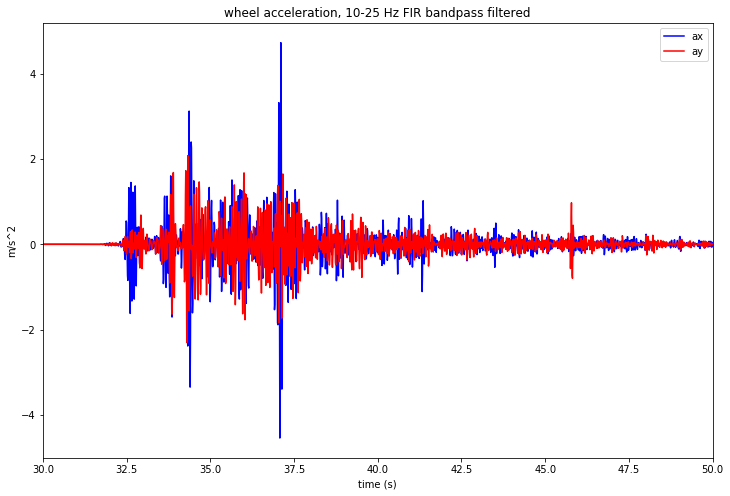

In [9]:
axf = signal.lfilter(d,1,axi)
ayf = signal.lfilter(d,1,ayi)

plt.figure(figsize=(12, 8))
plt.plot(tint, axf, label='ax', color='b')
plt.plot(tint, ayf, label='ay', color='r')
plt.xlim(xlim[:])
plt.xlabel('time (s)')
plt.ylabel('m/s^2')
plt.title('wheel acceleration, 10-25 Hz FIR bandpass filtered')
plt.legend()
plt.show()

Wheel slips are seen (especially in the $a_x$ component), although much less clearly compared with wavelet filtering.

## Infinite Impulse Response (IIR) filters

In case of IIR filters the filter output is feeded back into the input, and this recursion allows us to create infinte impulse response. Filtering equation connects input $x$ with output $y$:

$$ y[n]=a_0 x[n] + a_1 x[n-1] + a_2 x[n-2] + ... + b_1 y[n-1] + b_2 y[n-2] + ... ,$$

where $a_0$, $a_1$, $a_2$, ..., $b_1$, $b_2$, ... denotes filter coefficients. For *single pole* filters only coefficients $a_0$, $a_1$ and $b_1$ are nonzero. The equation of these filters is

$$ y[n]=a_0 x[n] + a_1 x[n-1] + b_1 y[n-1].$$

Recursive filters are best understood via *z-transform*. This topic will be discussed next.

## z-transform

*z-transform* of a discrete series $x[k]$ is

$$ X(z)=\sum_{n=-\infty}^{\infty} x[n] z^{-n} .$$

Domain of the complex variable $z$ can be characterised with two polar variables $r$ and $\omega$:

$$ z = re^{-j\omega}.$$

An IIR filter's z-transform is calculated by taking transforms of both sides of the fiter equation. *Transfer function* of the system is the ratio of z-transforms of $x[]$  and $y[]$:

$$ H(z) = \frac{Y(z)}{X(z)} = \frac{a_0+a_1 z^{-1}+a_2 z^{-2}+a_3 z^{-3}+ ...}{1-b_1 z^{-1}-b_2 z^{-2}-b_3 z^{-3}- ...}.$$

It is seen that the filter's transfer function can be calculated from the filter coefficients. The number of coefficients $a_k$ or $b_k$ is the filter's *order*. If both the numerator and denominator are multiplied with $z$ raised to the power equal with the filter's order we get polynomials that can be factored like

$$ H(z) = \frac{Y(z)}{X(z)} = \frac{(z-z_1)(z-z_2)(z-z_3)\cdots}{(z-p_1)(z-p_2)(z-p_3)\cdots}$$

where $z_1$, $z_2$, $z_3$, ... are the *zeroes*, $p_1$, $p_2$, $p_3$, ... are the *poles*. 

Function $H(z)$ is complex, but its magnitude $|H(z)|$ can be visualized in 3D, since it defines a surface over the complex *z-domain*. This function is zero at the zeroes and infinite at the poles. For example, let us plot absolute value of the transfer function 

$$ H(z)=\frac{1-z^{-2}}{1+0.7725z^{-2}} = \frac{(z+1)(z-1)}{(z+0.85i)(z-0.85i)}.$$

Zeroes are represented by blue circles, poles by red x's.

![transfer function](Hz.png "transfer function")

Frequency response of an IIR filter is given by function values along the unit circle in the z-plane (red dashed line in the figure).  At the (1,0) point of the ![pz-figure](pzplot_en.png "Pole-zero plot with unit circle") is zero frequency, at (-1,0) point is Nyquist frequency (half sampling frequency). Since transfer function is symmetrical with respect to the real axis, we need only the upper half semicircle.

Let us plot frequency and phase responses of the filter given above. Filter coefficients are $a_0 = 1$, $a_1=0$, $a_2=-1$, $b_1=0$, $b_2=0.7225$.

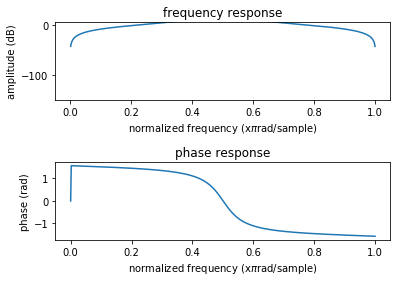

In [10]:
with np.errstate(divide='ignore'):
    mfreqz([1.0,0.0,-1.0],[1.0,0.0,0.7225])
plt.show()

Filter's passband and nonlinear phase response are clearly visible. Nonlinear phase response is a general characteristics of IIR filters in contrast to FIR filters which have a linear phase response.

Two functions in `scipy.signal` module are available for IIR fiter design: [iirdesign](http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.iirdesign.html) and [iirfilter](http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.iirfilter.html). Let us design a Chebyshev II type IIR filter with 4 Hz cutoff frequency with `iirfilter`.

In [11]:
b, a = signal.iirfilter(17, 4.0/50.0, rs=60, btype='lowpass', ftype='cheby2')

Order of the filter is 17 and its stopband attenuation is at least 60 dB. Let us plot its frequency and phase response functions.

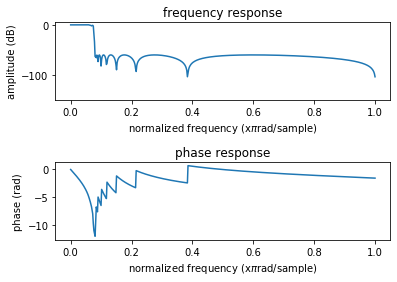

In [12]:
mfreqz(b,a)
plt.show()

Let us use this filter for filtering wheel acceleration data.

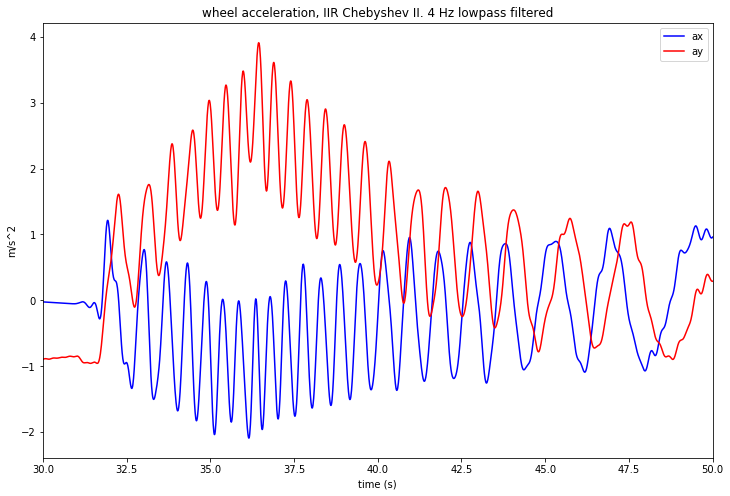

In [13]:
axf = signal.lfilter(b,a,axi)
ayf = signal.lfilter(b,a,ayi)

plt.figure(figsize=(12, 8))
plt.plot(tint, axf, label='ax', color='b')
plt.plot(tint, ayf, label='ay', color='r')
plt.xlim(xlim[:])
plt.xlabel('time (s)')
plt.ylabel('m/s^2')
plt.title('wheel acceleration, IIR Chebyshev II. 4 Hz lowpass filtered')
plt.legend()
plt.show()

Finally compare the results of FIR and IIR filtering.

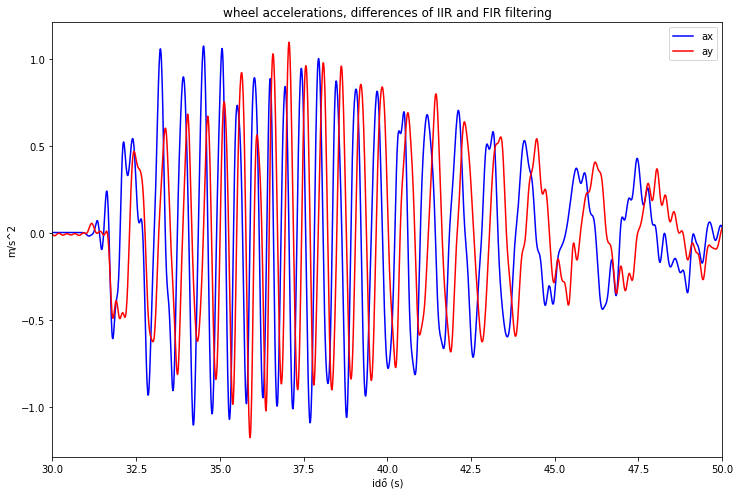

In [14]:
plt.figure(figsize=(12, 8))
plt.plot(tint, axf1-axf, label='ax', color='b')
plt.plot(tint, ayf1-ayf, label='ay', color='r')
plt.xlim(xlim[:])
plt.xlabel('idő (s)')
plt.ylabel('m/s^2')
plt.title('wheel accelerations, differences of IIR and FIR filtering')
plt.legend()
plt.show()

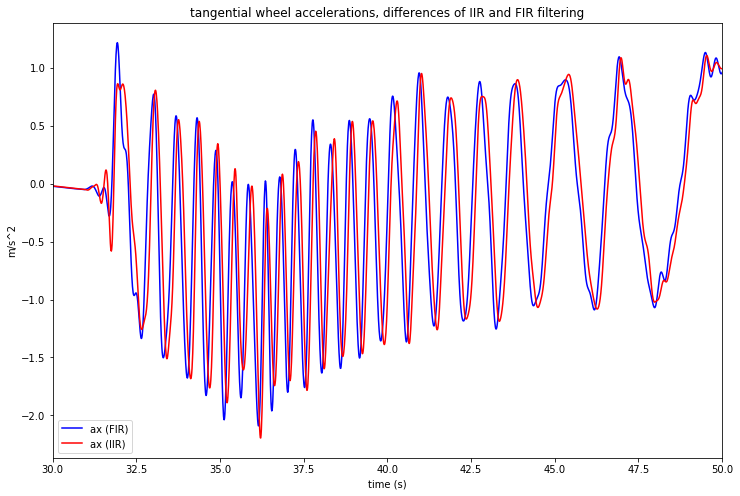

In [15]:
plt.figure(figsize=(12, 8))
plt.plot(tint, axf, label='ax (FIR)', color='b')
plt.plot(tint, axf1, label='ax (IIR)', color='r')
plt.xlim(xlim[:])
plt.xlabel('time (s)')
plt.ylabel('m/s^2')
plt.title('tangential wheel accelerations, differences of IIR and FIR filtering')
plt.legend()
plt.show()

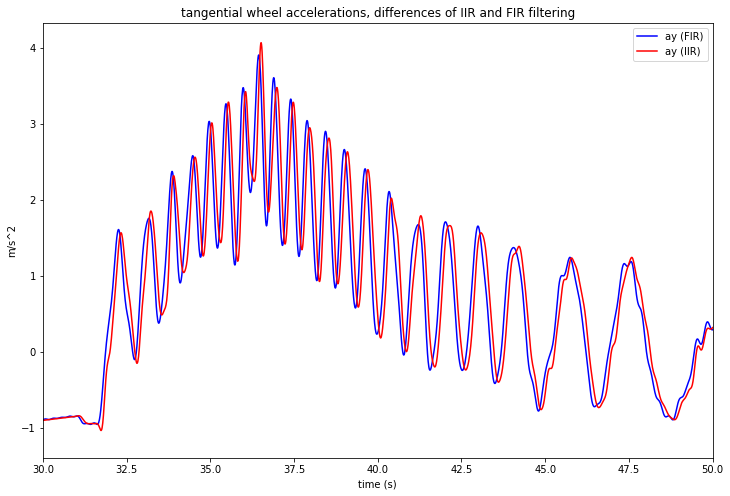

In [16]:
plt.figure(figsize=(12, 8))
plt.plot(tint, ayf, label='ay (FIR)', color='b')
plt.plot(tint, ayf1, label='ay (IIR)', color='r')
plt.xlim(xlim[:])
plt.xlabel('time (s)')
plt.ylabel('m/s^2')
plt.title('tangential wheel accelerations, differences of IIR and FIR filtering')
plt.legend()
plt.show()

It is clearly visible that due to the nonlinear phase response of the IIR filter the filtered signal's phase has been changed, i.e. the curves are shifted. If the phases need to be preserved it is very important to use a filter with linear phase response.

Phase shift can be determined from the maximum of the crosscorrelation function.

In [17]:
from scipy.signal import correlate

nsamples = axf.size

# normalization to mean and std of the dataset
#axf -= axf.mean(); axf /= axf.std()
#axf1 -= axf1.mean(); axf1 /= axf1.std()

# calculate crosscorrelation
xcorr = correlate(axf1, axf)

# delta_t array
dtt = np.arange(1-nsamples, nsamples)

time_shift = dtt[xcorr.argmax()]

print ("calculated shift: %d" % (time_shift))

calculated shift: 8


We mention that a similar tool to Matlab's graphical filter design tool called `fdatool` (although with reduced functionality) is available in Python. This tool, `pyFDA`, can be downloaded from Christian Münker's GitHub [page](https://github.com/chipmuenk/pyFDA). The following figure shows this tool: ![pyFDA](pyFDA.png "Python graphical filter design tool")